## System of linear equations

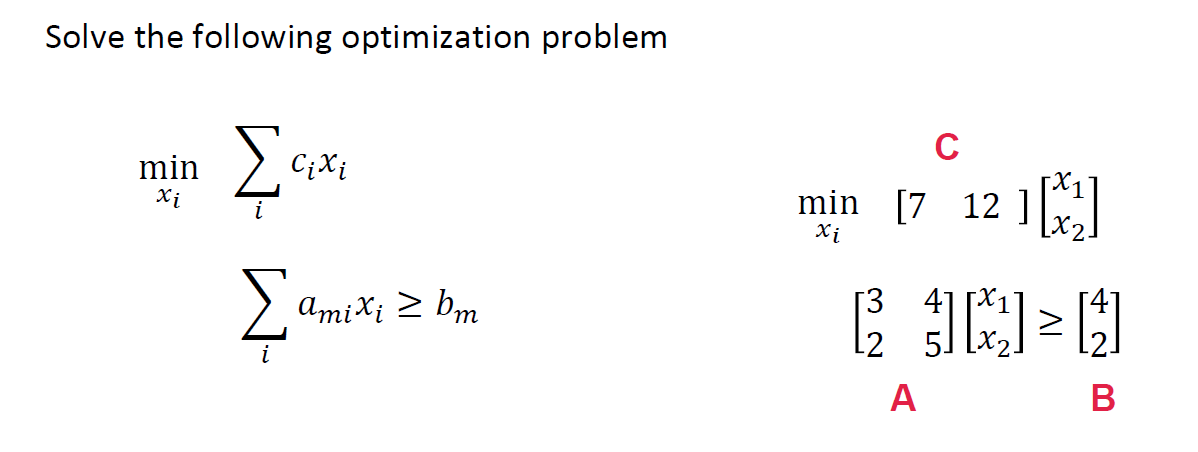

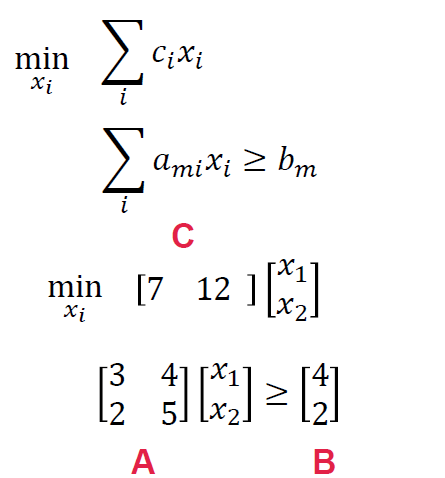

 ### Google Colab

In [2]:
!pip install -q pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
ipopt_executable = '/content/ipopt'

## Mac-OS

In [ ]:
!pip install -q pyomo
!curl -s https://ampl.com/dl/open/ipopt/ipopt-osx.zip --output ipopt-osx.zip
!tar xf ipopt-osx.zip ipopt
ipopt_executable = "./ipopt"
!rm ipopt-osx.zip

## Window PC

In [ ]:
!conda install -c conda-forge pyomo pyomo.extras
!conda install -c conda-forge/label/cf201901 ipopt 

 ### Google Colab

In [58]:
from pyomo.environ import *
import numpy as np

In [59]:
A0 ={(1,1): 3,
     (1,2): 4,
     (2,1): 2,
     (2,2): 5,
   }

b0 ={ 1:4,
      2:2, 
}

c0 = {1:7,
      2:12,
      }

In [60]:
model = model = ConcreteModel()

model.N = Set(initialize = range(1,3) )
model.M = Set(initialize = range(1,3) )

model.N.pprint()
model.M.pprint()


N : Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain : Size : Members
    None :     1 :    Any :    2 : {1, 2}
M : Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain : Size : Members
    None :     1 :    Any :    2 : {1, 2}


In [61]:

model.a = Param(model.M, model.N, initialize = A0)
model.b = Param(model.M, initialize = b0)
model.c = Param(model.M, initialize = c0)


model.x = Var(model.N, within=NonNegativeReals)


model.a.pprint()
model.b.pprint()
model.c.pprint()


model.x.pprint()


a : Size=4, Index=a_index, Domain=Any, Default=None, Mutable=False
    Key    : Value
    (1, 1) :     3
    (1, 2) :     4
    (2, 1) :     2
    (2, 2) :     5
b : Size=2, Index=M, Domain=Any, Default=None, Mutable=False
    Key : Value
      1 :     4
      2 :     2
c : Size=2, Index=M, Domain=Any, Default=None, Mutable=False
    Key : Value
      1 :     7
      2 :    12
x : Size=2, Index=N
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :  None :  None : False :  True : NonNegativeReals
      2 :     0 :  None :  None : False :  True : NonNegativeReals


In [62]:
def con_rule(model, m):
    return sum(model.a[m,i]*model.x[i] for i in model.N) >= model.b[m]

model.con = Constraint(model.M, rule=con_rule)

In [63]:
def obj_rule(model):
    return sum(model.c[i]*model.x[i] for i in model.N)


model.OF  = Objective(rule=obj_rule,sense=minimize)

In [66]:
opt = SolverFactory('ipopt')
results = opt.solve(model)

In [69]:
for i in model.N:
    print('X'+str(i)+'= ',round(value(model.x[i]),2))
print('OF=',round(value(model.OF),2))

X1=  1.33
X2=  0.0
OF= 9.33


## Consider the following binary knapsack instance.

\begin{align}
    \text{max}~~  & 3 x_1 + 4 x_2 + 5 x_3 + 8 x_4 + 9 x_5 \\
    \text{s.t.}~~ & 2 x_1 + 3 x_2 + 4 x_3 + 7 x_4 + 9 x_5 \le 20 \\
                  & x_1, x_2, x_3, x_4, x_5 \in \{0, 1\}
\end{align}

### Method 1

In [114]:
from pyomo.environ import *
import numpy as np


model = AbstractModel()

model.x1 = Var(domain=Binary)
model.x2 = Var(domain=Binary)
model.x3 = Var(domain=Binary)
model.x4 = Var(domain=Binary)
model.x5 = Var(domain=Binary)

In [115]:
con_expr = 2 * model.x1 + 3 * model.x2 + 4 * model.x3 + 5 * model.x4 + 9 * model.x5 <= 20
model.con = Constraint(expr=con_expr)

In [116]:
obj_expr  = 3 * model.x1 + 4 * model.x2 + 5 * model.x3 + 8 * model.x4 + 9 * model.x5
model.obj = Objective(sense=maximize, expr=obj_expr)

In [117]:
opt = SolverFactory('ipopt')
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance

In [118]:
print(value(instance.x1))
print(value(instance.x2))
print(value(instance.x3))
print(value(instance.x4))
print(value(instance.x5))
print(value(instance.obj))

1.0
1.0
1.0
1.0
0.6666666760303709
26.00000008427334


In [122]:
print(value(instance.con),value(instance.obj))

20.00000008427334 26.00000008427334


In [62]:
2 * value(instance.x1) + 3 * value(instance.x2) + 4 * value(instance.x3) + 5 * value(instance.x4) + 9 * value(instance.x5) 

20.00000008427334

## method 2

In [83]:
from pyomo.environ import *
import numpy as np


model = ConcreteModel()

model.x1 = Var(within=Binary, initialize=0)
model.x2 = Var(within=Binary, initialize=0)
model.x3 = Var(within=Binary, initialize=0)
model.x4 = Var(within=Binary, initialize=0)
model.x5 = Var(within=Binary, initialize=0)

In [84]:
con_expr = 2 * model.x1 + 3 * model.x2 + 4 * model.x3 + 5 * model.x4 + 9 * model.x5 <= 20
model.c1= Constraint(expr=con_expr)

In [85]:
obj_expr  = 3 * model.x1 + 4 * model.x2 + 5 * model.x3 + 8 * model.x4 + 9 * model.x5
model.obj = Objective(expr=obj_expr,sense=maximize)

In [86]:
opt     = SolverFactory('ipopt')
results = opt.solve(model);

In [87]:
print(value(instance.x1))
print(value(instance.x2))
print(value(instance.x3))
print(value(instance.x4))
print(value(instance.x5))
print(value(instance.obj))

1.0
1.0
1.0
1.0
0.6666666760303709
26.00000008427334


In [88]:
print(value(model.x1))
print(value(model.x2))
print(value(model.x3))
print(value(model.x4))
print(value(model.x5))
print(value(model.obj))

1.0
1.0
1.0
1.0
0.6666666760303709
26.00000008427334


## Model (General)
The best way to implement the general form of the problem. The instance above is generalized by the formulation below. The set of items is $N$. The coefficients $c_i$ and $a_i$ are the cost and size, respectively of item $i$.

\begin{align}
    \text{max}~~  & \sum_{i \in N}{c_i x_i} \\
    \text{s.t.}~~ & \sum_{i \in N}{a_i x_i} \le b \\
                  & x_i \in \{0, 1\}, \forall i \in N
\end{align}

In [124]:
from pyomo.environ import *
import numpy as np


model = ConcreteModel()

In [125]:
model.N = RangeSet(1, 5)

In [126]:
set(model.N)

{1, 2, 3, 4, 5}

In [127]:
c = {1: 3, 2: 4, 3: 5, 4: 8, 5: 9}
a = {1: 2, 2: 3, 3: 4, 4: 5, 5: 9}
b = 20

In [128]:
model.c = Param(model.N, initialize=c)
model.a = Param(model.N, initialize=a)
model.b = Param(initialize=b)


```
 
```

For most model components, `print(model.component)` will print the name of the component (a string) and not the value (in most cases, a number).

In [135]:
print(model.c)
print(model.c[2])
print(model.b)
print(model.b.value)
print(value(model.b))

c
4
b
20
20


In [136]:
model.x = Var(model.N, domain=Binary)

In [139]:
obj_expr = sum(model.c[i] * model.x[i] for i in model.N)
model.obj = Objective(sense=maximize, expr=obj_expr)

In [140]:
con_lhs_expr = sum(model.a[i] * model.x[i] for i in model.N)
con_rhs_expr = model.b
model.con    = Constraint(expr=(con_lhs_expr <= con_rhs_expr))

In [142]:
opt     = SolverFactory('ipopt')
results = opt.solve(model);

After solving, variable values may be accessed either by `pe.value(model.myvar)` or `model.myvar.value`.

In [143]:
for i in model.N:
    print(value(model.x[i]))
print(value(model.obj))

1.0
1.0
1.0
1.0
0.6666666760303709
26.00000008427334
